In [1]:
# Step 1: Import essential libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load dataset
file_path = "DATASET_v0.1.xlsx"
df = pd.read_excel(file_path, sheet_name="Data Sheet")

# Step 3: Rename columns for ease of use
df.columns = [
    "Sample", "Arsenic (mg/L)", "Cadmium (mg/L)", "Chromium (mg/L)", "Lead (mg/L)", "pH",
    "TDS (mg/L)", "Conductivity (µS/cm)", "Total Hardness (mg/L)",
    "Calcium Hardness (mg/L)", "Magnesium Hardness (mg/L)"
]

# Step 4: Preview the data
df.head()


/home/pcosby50/galamsey_hackathon/venv/lib/python3.10/site-packages/numpy/_core/getlimits.py:551: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)
Matplotlib is building the font cache; this may take a moment.


,Sample,Arsenic (mg/L),Cadmium (mg/L),Chromium (mg/L),Lead (mg/L),pH,TDS (mg/L),Conductivity (µS/cm),Total Hardness (mg/L),Calcium Hardness (mg/L),Magnesium Hardness (mg/L)
0,River Oda,0.364,0.000,0.103,0.073,5.93,0.08,0.16,3.0,1.2,1.8
1,River Birim,0.372,0.000,0.037,0.065,5.96,0.05,0.10,2.4,1.0,1.4
2,River Pra Twifo,0.305,0.000,0.115,0.133,5.65,0.06,0.12,2.2,1.0,1.2
3,River Ankobra,0.221,0.000,0.293,0.119,5.70,0.06,0.12,1.6,0.7,0.9
4,River Subri,0.000,0.013,1.607,0.208,5.25,0.03,0.06,5.0,1.8,3.2


In [2]:
# Check for missing values
df.isnull().sum()


Sample                       0
Arsenic (mg/L)               0
Cadmium (mg/L)               0
Chromium (mg/L)              0
Lead (mg/L)                  0
pH                           0
TDS (mg/L)                   0
Conductivity (µS/cm)         0
Total Hardness (mg/L)        0
Calcium Hardness (mg/L)      0
Magnesium Hardness (mg/L)    0
dtype: int64

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Sample                     12 non-null     object 
 1   Arsenic (mg/L)             12 non-null     float64
 2   Cadmium (mg/L)             12 non-null     float64
 3   Chromium (mg/L)            12 non-null     float64
 4   Lead (mg/L)                12 non-null     float64
 5   pH                         12 non-null     float64
 6   TDS (mg/L)                 12 non-null     float64
 7   Conductivity (µS/cm)       12 non-null     float64
 8   Total Hardness (mg/L)      12 non-null     float64
 9   Calcium Hardness (mg/L)    12 non-null     float64
 10  Magnesium Hardness (mg/L)  12 non-null     float64
dtypes: float64(10), object(1)
memory usage: 1.2+ KB


In [5]:
df.describe()

,Arsenic (mg/L),Cadmium (mg/L),Chromium (mg/L),Lead (mg/L),pH,TDS (mg/L),Conductivity (µS/cm),Total Hardness (mg/L),Calcium Hardness (mg/L),Magnesium Hardness (mg/L)
count,12.00000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,0.29625,0.001083,0.279417,0.095583,5.575000,0.090833,0.179167,4.016667,1.650000,2.366667
std,0.11349,0.003753,0.431579,0.047314,0.803577,0.073665,0.145506,4.521028,1.887519,2.643116
min,0.00000,0.000000,0.021000,0.051000,3.210000,0.030000,0.060000,1.400000,0.600000,0.800000
25%,0.27125,0.000000,0.101250,0.064250,5.635000,0.050000,0.100000,2.200000,0.950000,1.200000
50%,0.32300,0.000000,0.148500,0.076000,5.680000,0.060000,0.120000,2.700000,1.000000,1.600000
75%,0.36475,0.000000,0.213500,0.122500,5.937500,0.095000,0.192500,3.300000,1.350000,2.050000
max,0.44400,0.013000,1.607000,0.208000,6.460000,0.290000,0.570000,18.000000,7.500000,10.500000


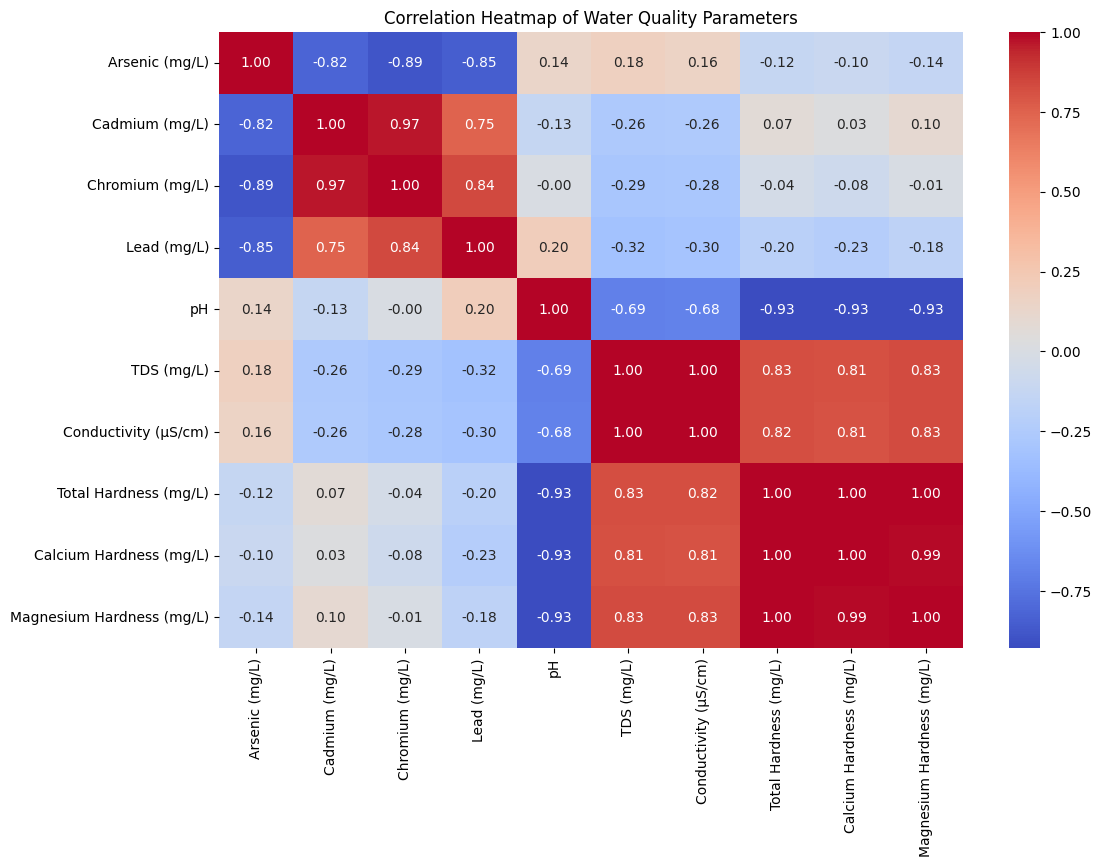

In [6]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Water Quality Parameters")
plt.show()


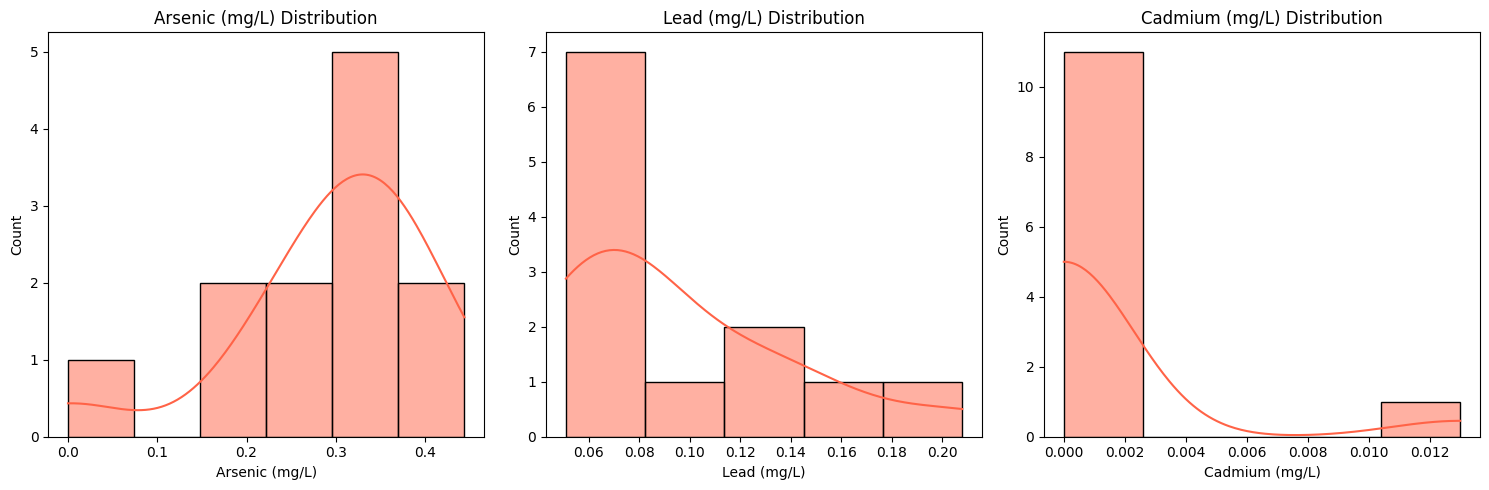

In [7]:
heavy_metals = ["Arsenic (mg/L)", "Lead (mg/L)", "Cadmium (mg/L)"]

plt.figure(figsize=(15, 5))
for i, metal in enumerate(heavy_metals):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[metal], kde=True, color="tomato")
    plt.title(f"{metal} Distribution")
plt.tight_layout()
plt.show()


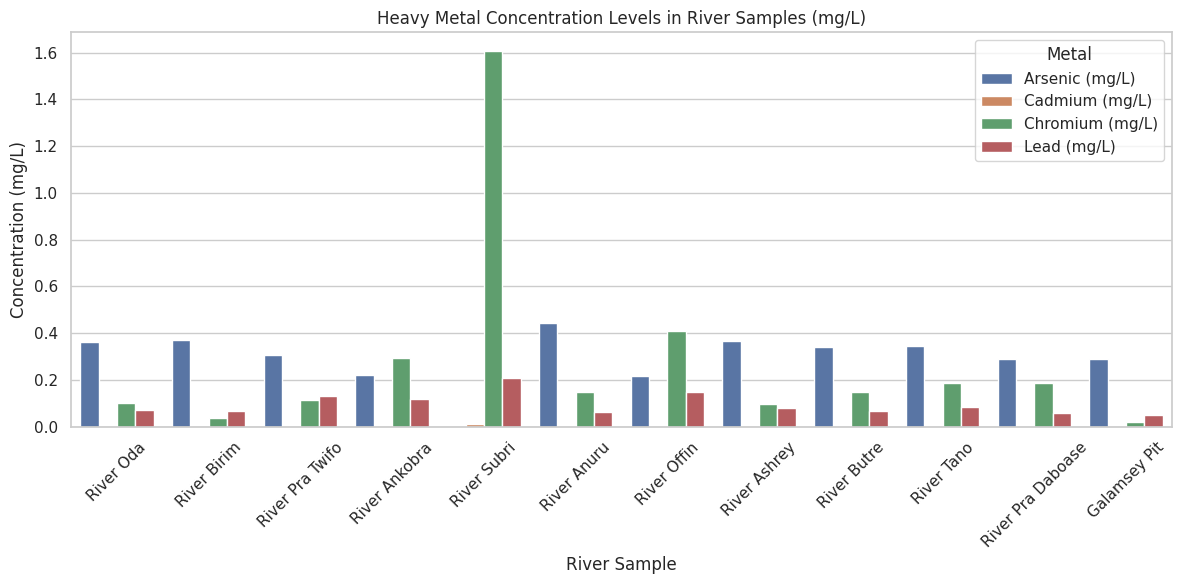

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your Excel file
data_df = pd.read_excel("DATASET_v0.1.xlsx", sheet_name="Data Sheet")

# Rename columns
data_df.columns = [
    "Sample", "Arsenic (mg/L)", "Cadmium (mg/L)", "Chromium (mg/L)", "Lead (mg/L)", "pH",
    "TDS (mg/L)", "Conductivity (µS/cm)", "Total Hardness (mg/L)",
    "Calcium Hardness (mg/L)", "Magnesium Hardness (mg/L)"
]

# Melt the DataFrame for plotting
melted_df = data_df.melt(id_vars="Sample", value_vars=[
    "Arsenic (mg/L)", "Cadmium (mg/L)", "Chromium (mg/L)", "Lead (mg/L)"
], var_name="Metal", value_name="Concentration")

# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x="Sample", y="Concentration", hue="Metal")
plt.title("Heavy Metal Concentration Levels in River Samples (mg/L)")
plt.ylabel("Concentration (mg/L)")
plt.xlabel("River Sample")
plt.xticks(rotation=45)
plt.legend(title="Metal")
plt.tight_layout()
plt.show()


In [10]:
df.columns.tolist()


['Sample',
 'Arsenic (mg/L)',
 'Cadmium (mg/L)',
 'Chromium (mg/L)',
 'Lead (mg/L)',
 'pH',
 'TDS (mg/L)',
 'Conductivity (µS/cm)',
 'Total Hardness (mg/L)',
 'Calcium Hardness (mg/L)',
 'Magnesium Hardness (mg/L)']

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Sample                     12 non-null     object 
 1   Arsenic (mg/L)             12 non-null     float64
 2   Cadmium (mg/L)             12 non-null     float64
 3   Chromium (mg/L)            12 non-null     float64
 4   Lead (mg/L)                12 non-null     float64
 5   pH                         12 non-null     float64
 6   TDS (mg/L)                 12 non-null     float64
 7   Conductivity (µS/cm)       12 non-null     float64
 8   Total Hardness (mg/L)      12 non-null     float64
 9   Calcium Hardness (mg/L)    12 non-null     float64
 10  Magnesium Hardness (mg/L)  12 non-null     float64
dtypes: float64(10), object(1)
memory usage: 1.2+ KB


In [12]:
df.head()


,Sample,Arsenic (mg/L),Cadmium (mg/L),Chromium (mg/L),Lead (mg/L),pH,TDS (mg/L),Conductivity (µS/cm),Total Hardness (mg/L),Calcium Hardness (mg/L),Magnesium Hardness (mg/L)
0,River Oda,0.364,0.000,0.103,0.073,5.93,0.08,0.16,3.0,1.2,1.8
1,River Birim,0.372,0.000,0.037,0.065,5.96,0.05,0.10,2.4,1.0,1.4
2,River Pra Twifo,0.305,0.000,0.115,0.133,5.65,0.06,0.12,2.2,1.0,1.2
3,River Ankobra,0.221,0.000,0.293,0.119,5.70,0.06,0.12,1.6,0.7,0.9
4,River Subri,0.000,0.013,1.607,0.208,5.25,0.03,0.06,5.0,1.8,3.2


In [14]:
# WHO permissible limits (in mg/L)
who_limits = {
    'Arsenic (mg/L)': 0.01,
    'Cadmium (mg/L)': 0.003,
    'Chromium (mg/L)': 0.05,
    'Lead (mg/L)': 0.01,
}

# Create a copy of the original DataFrame for flagging
df_flags = df.copy()

# Add flag columns
for metal, limit in who_limits.items():
    flag_col = metal.split()[0] + '_Exceeds_Limit'  # e.g. Arsenic_Exceeds_Limit
    df_flags[flag_col] = df_flags[metal] > limit

# Boolean mask where any of the heavy metal limits are exceeded
any_exceeds = df_flags[[col for col in df_flags.columns if 'Exceeds_Limit' in col]].any(axis=1)

# Filter the rows where any metal exceeds the limit
exceeding_rivers = df_flags[any_exceeds]

print("Rivers where at least one heavy metal exceeds WHO limits:")
print(exceeding_rivers[['Sample'] + [col for col in df_flags.columns if 'Exceeds_Limit' in col]])


Rivers where at least one heavy metal exceeds WHO limits:
               Sample  Arsenic_Exceeds_Limit  Cadmium_Exceeds_Limit  \
0           River Oda                   True                  False   
1         River Birim                   True                  False   
2     River Pra Twifo                   True                  False   
3       River Ankobra                   True                  False   
4         River Subri                  False                   True   
5         River Anuru                   True                  False   
6         River Offin                   True                  False   
7        River Ashrey                   True                  False   
8         River Butre                   True                  False   
9          River Tano                   True                  False   
10  River Pra Daboase                   True                  False   
11       Galamsey Pit                   True                  False   

    Chromium_Excee